## Heart attack analysis and prediction

In [2]:
import numpy as np 
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
main_df = pd.read_csv('C:/DataFiles/Masters2023/CS4200/Project/heart.csv')
df = main_df.copy()

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df.shape

(303, 14)

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [14]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
#  check for null value 
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [17]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

## Visualization

<Axes: >

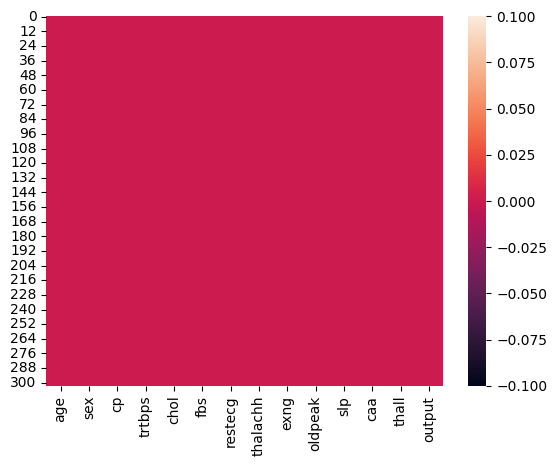

In [18]:
sns.heatmap(df.isnull())

<Axes: >

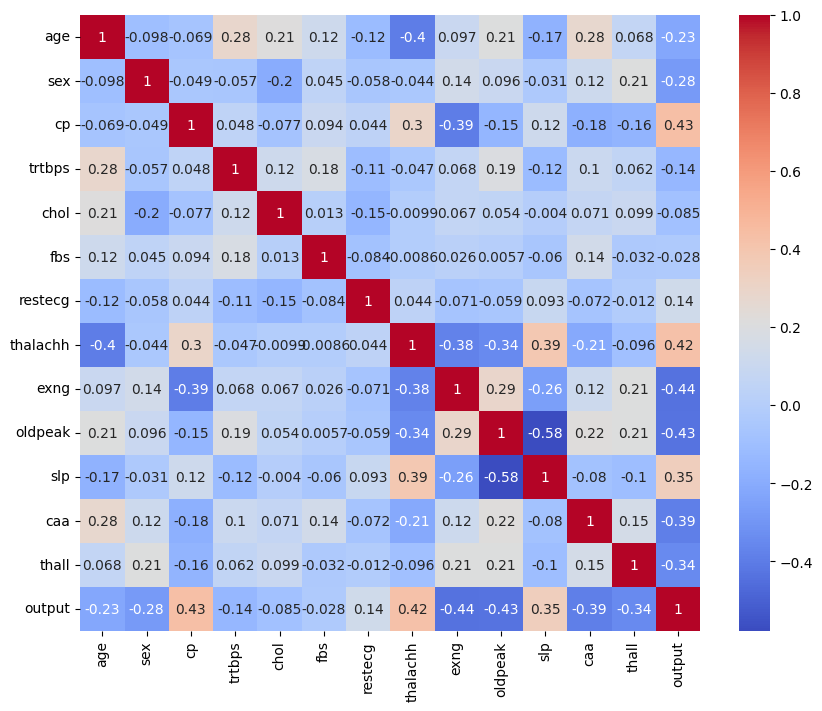

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

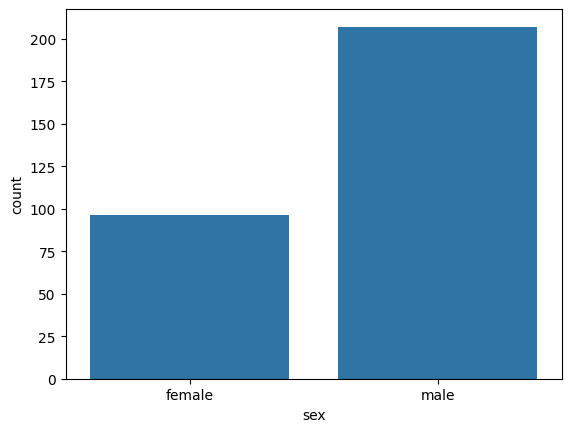

In [20]:
ax = sns.countplot(x = "sex",data= df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["female", "male"])
plt.show()

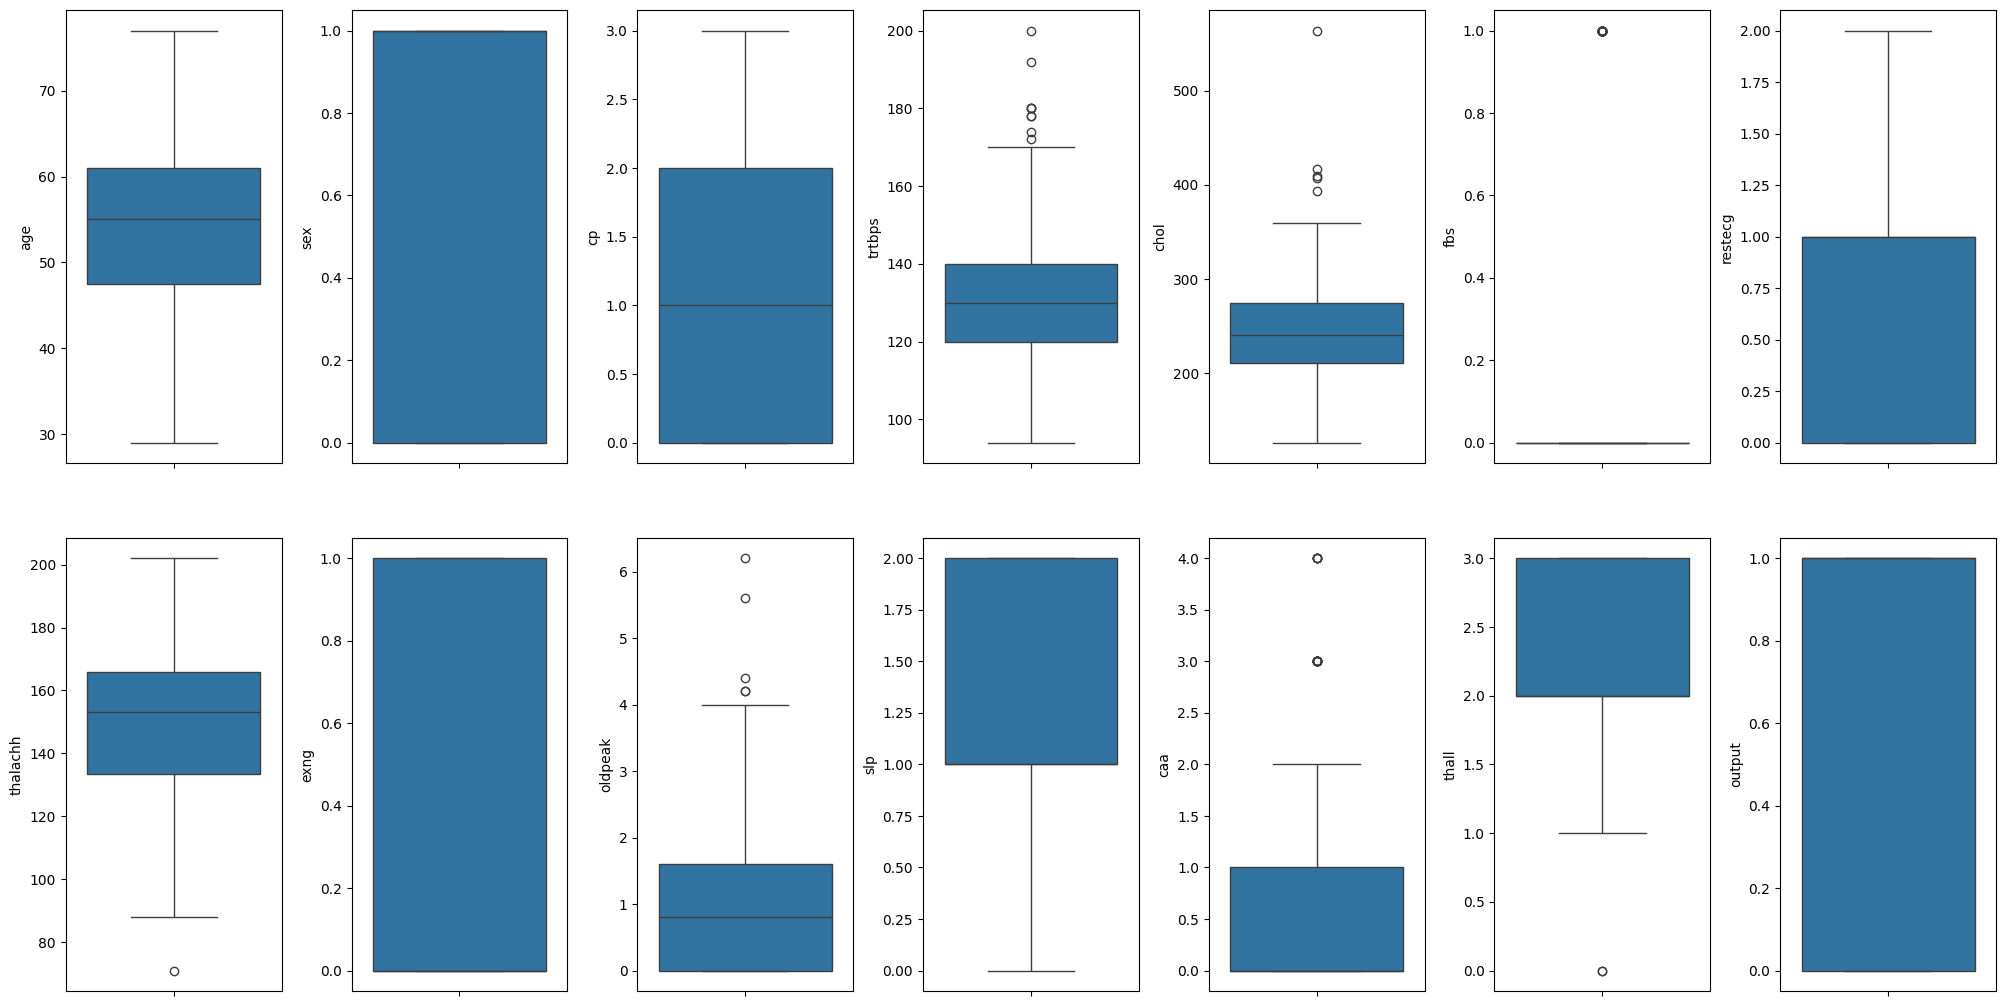

In [21]:
# Visualizing dataset and also checking for outliers 

fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

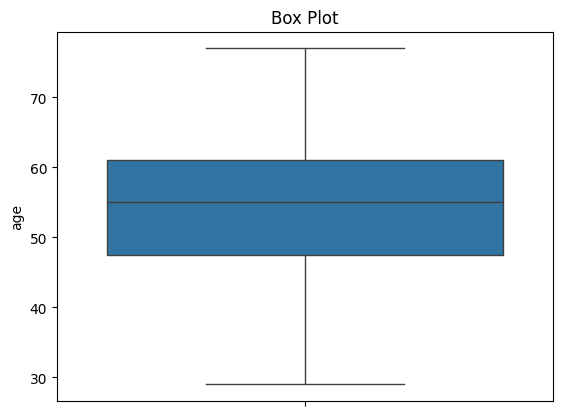

In [22]:
# Individual box plot for each feature
def Box(df):
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box(df['age'])

<Axes: xlabel='age', ylabel='Count'>

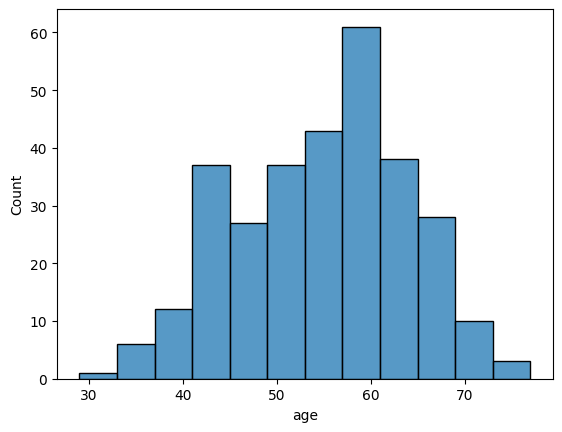

In [23]:
sns.histplot(x = "age", data=df)

In [24]:
# Min-Max normalization
# Here we are taking only 4 column for normalization because in this the value are too high as compare to others

cols = ['trtbps', 'chol', 'thalachh', 'oldpeak', 'age']
for col in cols:
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum)/ (maximum - minimum)

In [25]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


In [26]:
print(df[["sex", "output"]].groupby(['sex']).mean())

       output
sex          
0    0.750000
1    0.449275


In [27]:
print(df[["cp", "output"]].groupby(['cp']).mean())

      output
cp          
0   0.272727
1   0.820000
2   0.793103
3   0.695652


In [28]:
print(df[["fbs", "output"]].groupby(['fbs']).mean())

       output
fbs          
0    0.550388
1    0.511111


In [29]:
print (df[["exng", "output"]].groupby(['exng']).mean())

        output
exng          
0     0.696078
1     0.232323


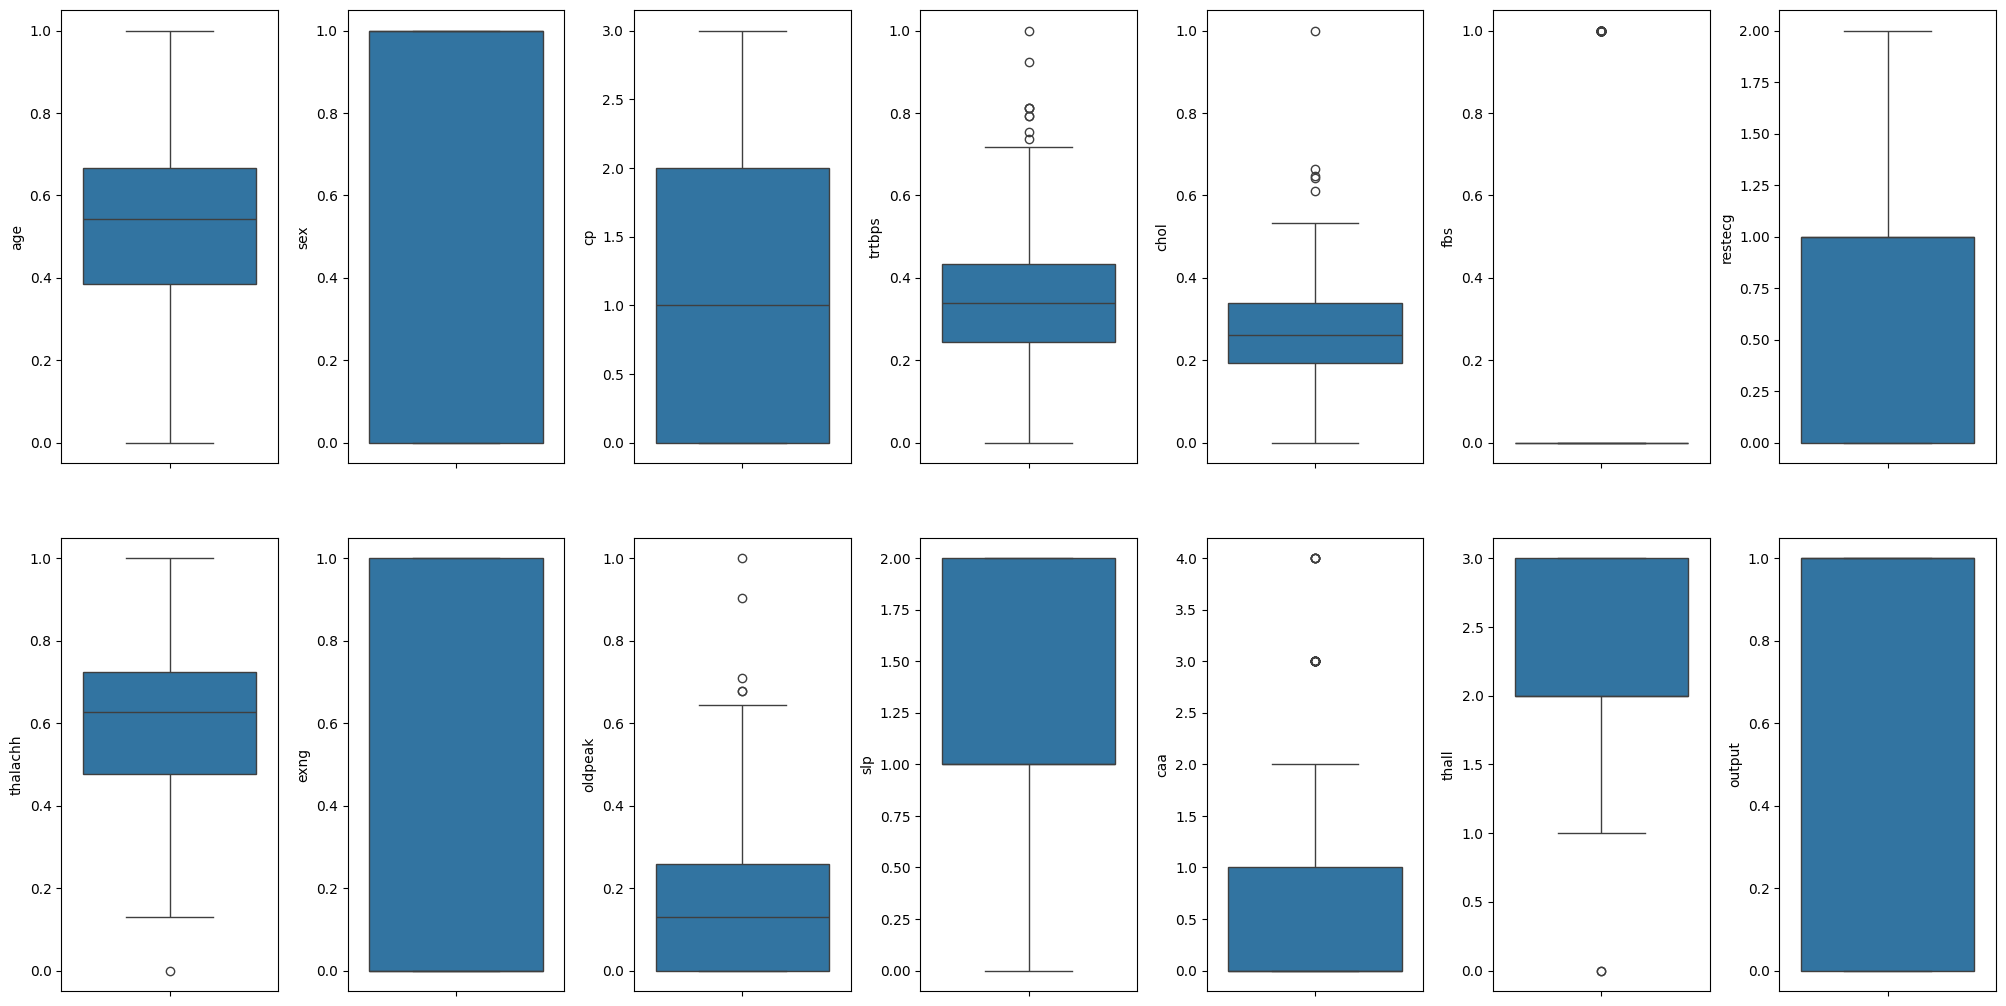

In [30]:
# Visualizing after min-max normalization 
fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

In [31]:
# Here we can see that after min-max normalization values now ranges from 0 to 1
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


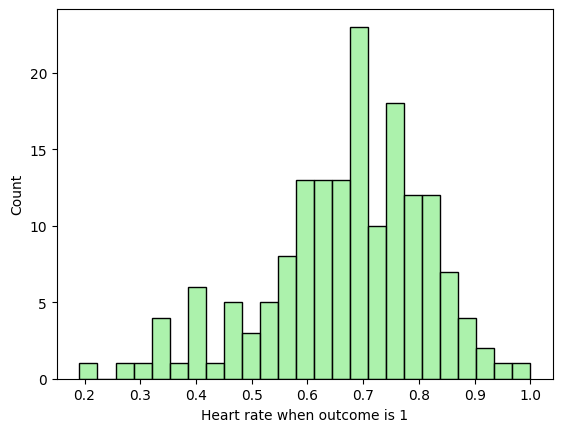

In [32]:
# Exploring dataset through visualization
df1=df[df["output"] == 1]
sns.histplot(df1["thalachh"],bins=25, color="lightgreen");
plt.xlabel("Heart rate when outcome is 1")
plt.show()

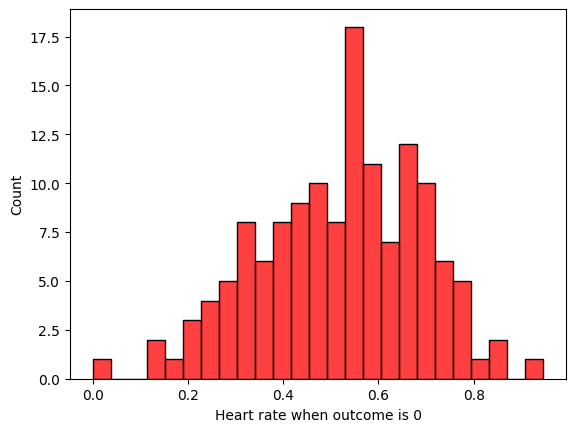

In [33]:
# Exploring dataset through visualization
df2=df[df["output"]==0]
sns.histplot(df2["thalachh"],bins=25,  color="red");
plt.xlabel("Heart rate when outcome is 0")
plt.show()

In [34]:
# dropping 'output' from dataframe and saving dataframe in X which is now acting as input column
X = df.drop("output", axis=1)
X.shape

(303, 13)

In [35]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [36]:
fig =  px.pie (df, names = "sex", hole = 0.4, template = "plotly_dark")
fig.show ()

In [37]:
fig =  px.pie (df, names = "cp", hole = 0.4, template = "plotly_dark")
fig.show ()

In [38]:
fig =  px.pie (df, names = "slp", hole = 0.4, template = "gridon")
fig.show ()

In [39]:
fig =  px.pie (df, names = "caa", hole = 0.4, template = "gridon")
fig.show ()

In [40]:
fig = px.histogram (df, x = "chol",  facet_row = "output",  template = 'plotly_dark')
fig.show ()

In [43]:
fig = px.histogram (df, x = "thalachh",  facet_row = "output",  template = 'gridon')
fig.show ()

In [45]:
fig = px.scatter (df, x = "thalachh", y = "oldpeak", color = "output", template = "plotly_dark",  trendline="ols")
fig.show ()

In [46]:
fig = px.scatter (df, x = "trtbps", y = "chol", color = "output", template = "gridon",  trendline="ols")
fig.show ()

In [47]:
fig = px.scatter (df, x = "thalachh", y = "chol", color = "output", template = "plotly_dark",  trendline="lowess")
fig.show ()

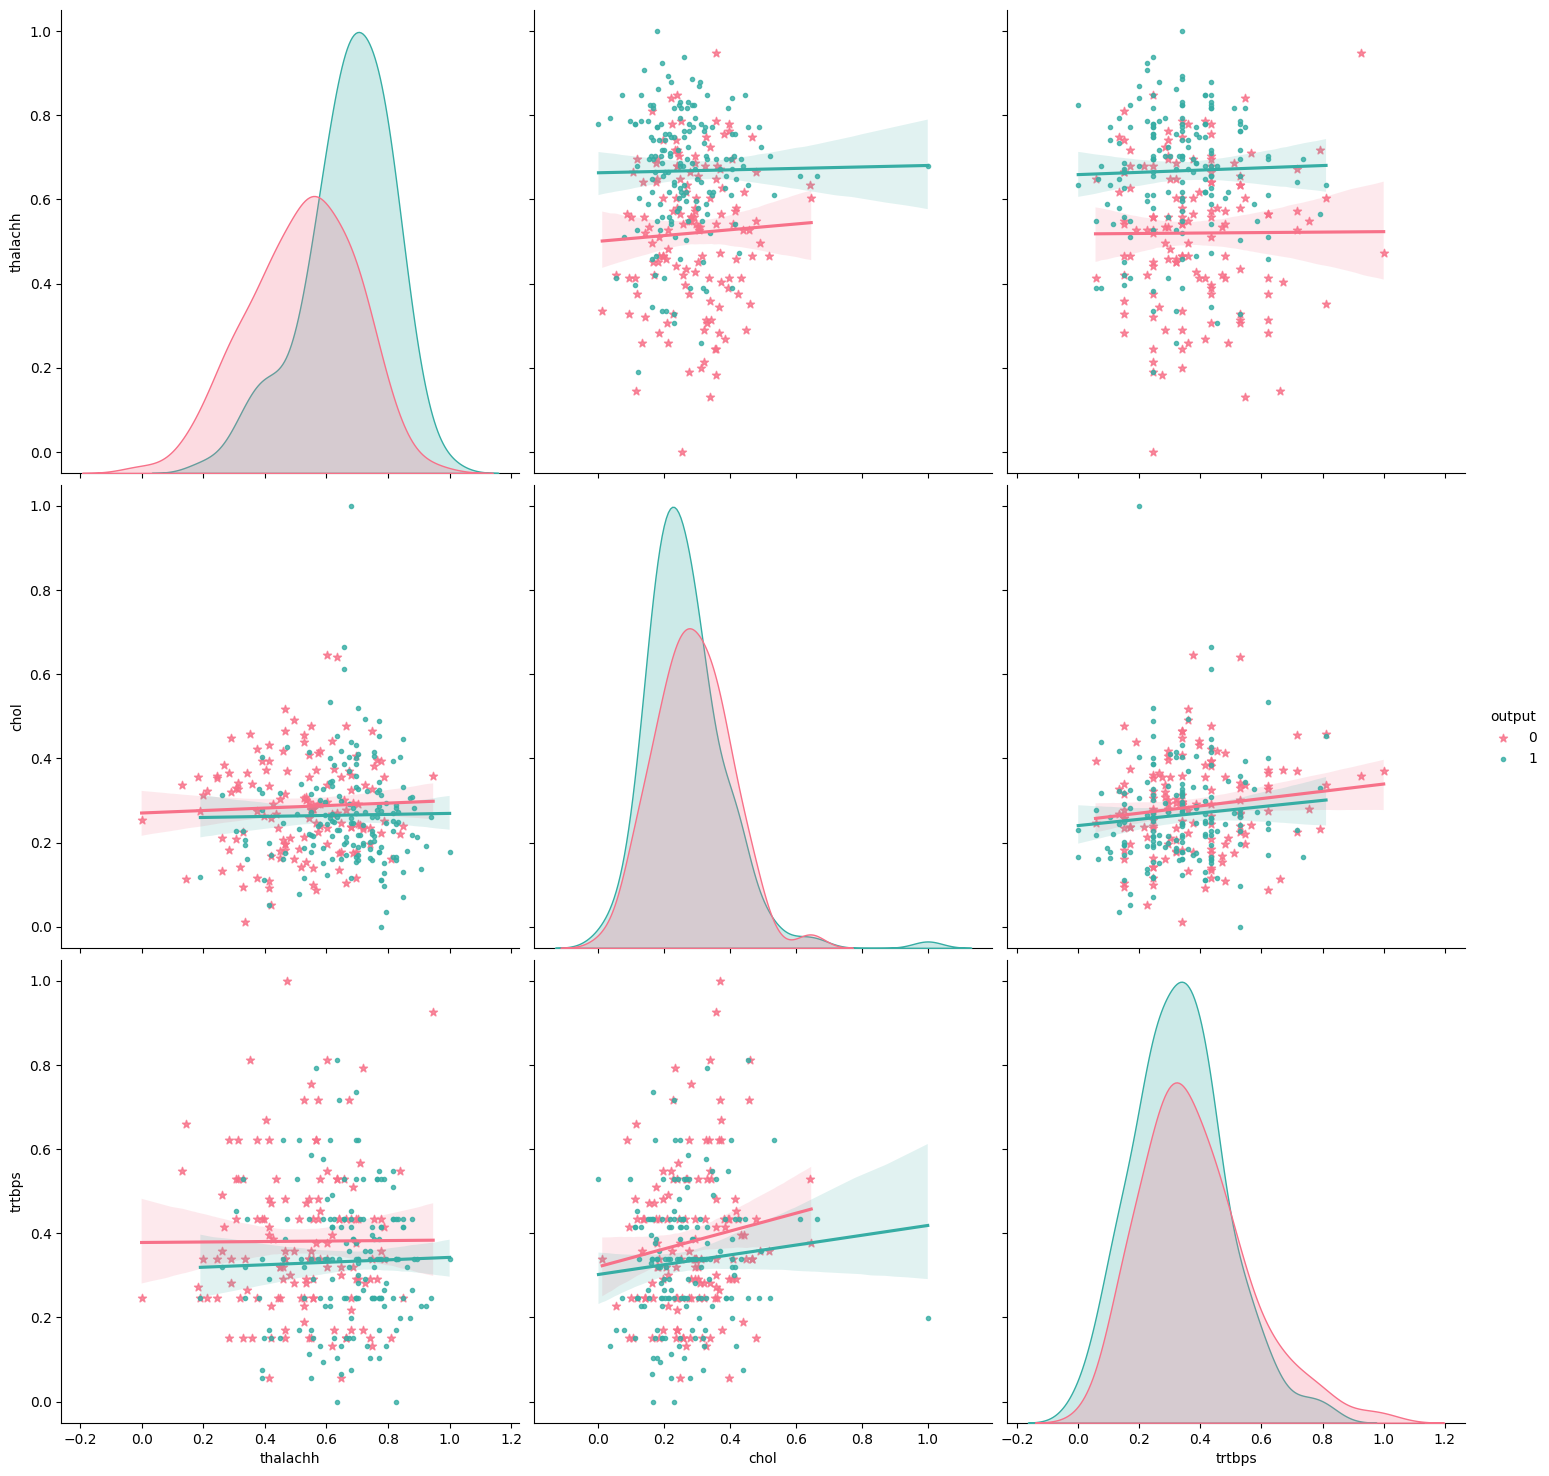

In [48]:
sns.pairplot(data=df, vars=['thalachh', 'chol', 'trtbps'], \
             hue='output', kind='reg', diag_kind='kde', markers=['*','.'], size=5, palette='husl')

In [49]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2


In [50]:
# y have only 'output' column 
y = df['output']
y.shape

(303,)

In [51]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=42)

## Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [53]:
# Creating model object
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

In [54]:
# Training Model
model_lg.fit(X_train, y_train)

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

In [55]:
# Making Prediction
pred_lg = model_lg.predict(X_test)

In [56]:
# Calculating Accuracy Score
lg = accuracy_score(y_test, pred_lg)
print(lg)

0.8360655737704918


<Axes: >

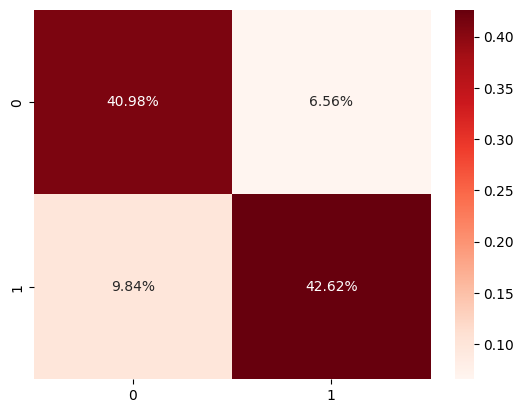

In [57]:
# confusion Maxtrix
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

## SVM

In [58]:
from sklearn.svm import SVC, LinearSVC

In [59]:
model_svm = SVC(kernel='rbf', random_state = 42)

In [60]:
model_svm.fit(X_train, y_train)

SVC(random_state=42)

In [61]:
# Making Prediction
pred_svm = model_svm.predict(X_test)

In [62]:
# Calculating Accuracy Score
sv = accuracy_score(y_test, pred_svm)
print(sv)

0.8688524590163934


<Axes: >

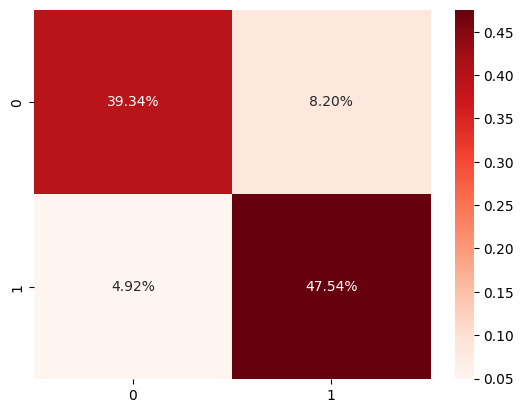

In [63]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')

## KNeighbours

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
# Creating model object
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

In [66]:
# Training Model
model_kn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=9)

In [67]:
# Making Prediction
pred_kn = model_kn.predict(X_test)

In [68]:
# Calculating Accuracy Score
kn = accuracy_score(y_test, pred_kn)
print(kn)

0.9016393442622951


<Axes: >

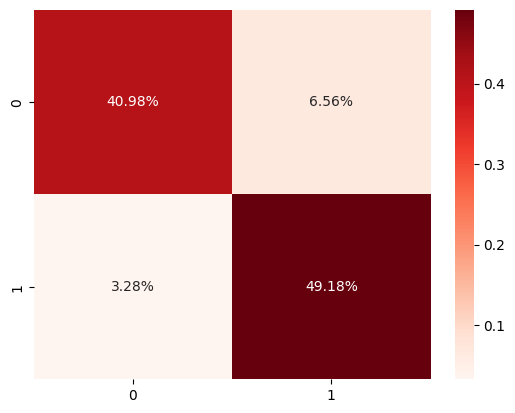

In [69]:
# confusion Maxtrix
cm5 = confusion_matrix(y_test, pred_kn)
sns.heatmap(cm5/np.sum(cm5), annot = True, fmt=  '0.2%', cmap = 'Reds')

## Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

In [72]:
# Training Model
model_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

In [73]:
# Making Prediction
pred_rf = model_rf.predict(X_test)

In [74]:
# Calculating Accuracy Score
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.9016393442622951


<Axes: >

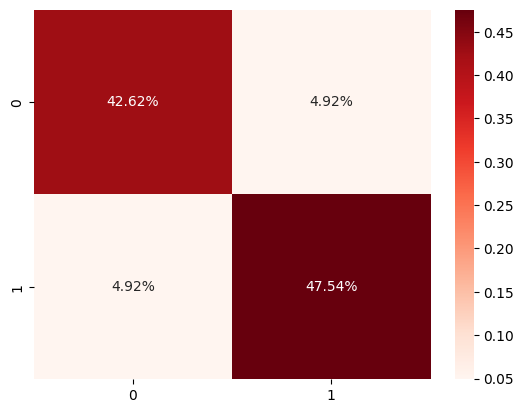

In [75]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')

## Accuracy Score Dataframe

,Model,Accuracy_score
1,Random Forest,0.901639
2,KNeighbours,0.901639
3,SVM,0.868852
0,Logistic Regression,0.836066


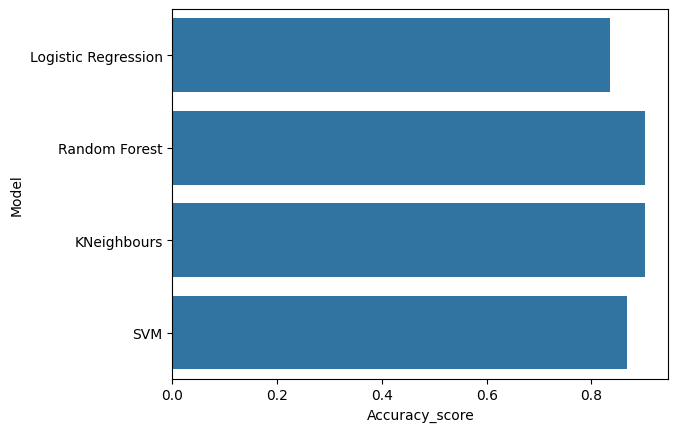

In [76]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Random Forest', 'KNeighbours', 'SVM'],
    'Accuracy_score' :[lg, rf, kn, sv]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)